In [ ]:
# Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM)
#              to predict the closing stock price of a corporation (SBI) using the past 60 day stock price.

In [ ]:
#Importing The Required Libraries
import warnings
warnings.filterwarnings('ignore')

import math
import pandas as pd
import numpy as np
import pandas_datareader as pdr    

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Dense, Activation

from sklearn import preprocessing, metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import files
#uploaded = files.upload()

In [ ]:
#Get no. of rows and column
df = pd.read_csv('/content/INFY_Final_CNN.csv')
df

,Date,close price,compound,neg,neu,pos,open,high,low,volume
0,04-04-2016,621.849976,0.0000,0.000,1.000,0.000,606.775024,624.000000,606.775024,4577054
1,05-04-2016,609.900024,0.3818,0.000,0.843,0.157,621.000000,621.150024,607.000000,4790716
2,07-04-2016,590.750000,0.0000,0.000,1.000,0.000,604.200012,604.200012,587.500000,5657890
3,11-04-2016,591.950012,-0.4767,0.237,0.763,0.000,582.900024,593.375000,575.549988,5768678
4,12-04-2016,591.099976,0.8807,0.000,0.263,0.737,590.250000,597.450012,589.299988,5842138
...,...,...,...,...,...,...,...,...,...,...
1108,23-04-2021,1333.800049,0.0000,0.000,1.000,0.000,1343.000000,1348.400024,1331.000000,7316262
1109,26-04-2021,1343.550049,0.8225,0.000,0.751,0.249,1332.250000,1351.300049,1321.000000,7088606
1110,27-04-2021,1348.500000,0.2960,0.049,0.852,0.099,1346.000000,1353.000000,1340.150024,3636115
1111,28-04-2021,1356.000000,0.2023,0.000,0.964,0.036,1358.000000,1359.500000,1344.599976,4879234


In [ ]:
df.shape

(1113, 10)

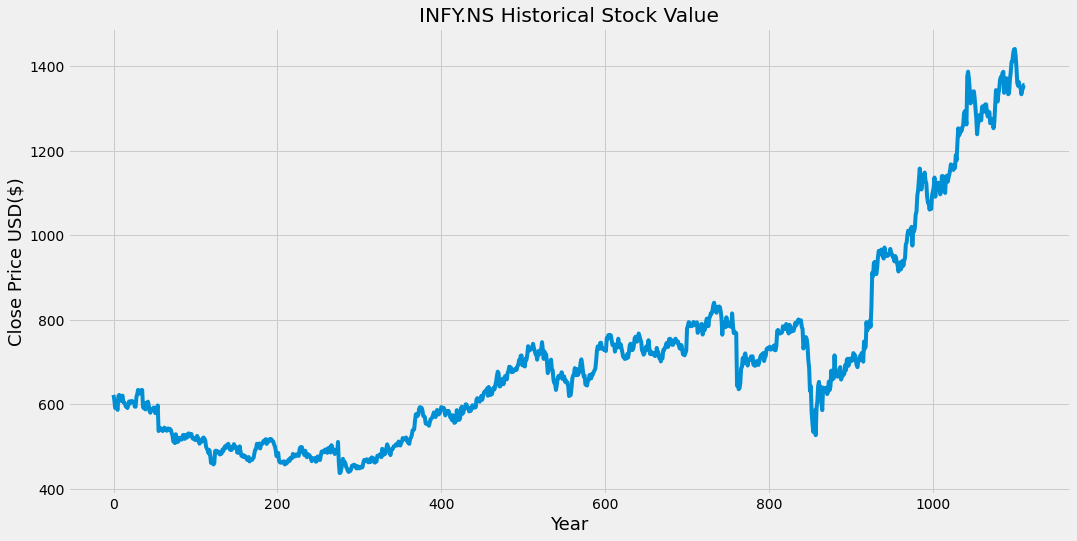

In [ ]:
# Showing the graph of Historical Stock Value of AAPL
plt.figure(figsize=(16,8))
plt.plot(df['close'])
plt.title('INFY.NS Historical Stock Value')
plt.xlabel('Year',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.show()

In [ ]:
# Create a new DataFrame with only "Close Column"
data=df.filter(['close'])

# Convert the dataframe into a numpy array
dataset = data.values

# Get the number of rows to train the Model On
training_data_len=math.ceil(len(dataset) * .8 )

training_data_len

891

In [ ]:
#Scaling the Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.18434804],
       [0.17244985],
       [0.15338277],
       ...,
       [0.9078508 ],
       [0.91531832],
       [0.91566678]])

In [ ]:
steps=1

In [ ]:
# Create the training  Data set
# Create the Scaled Training data set
train_data=scaled_data[0:training_data_len,:]

#split the data into X_train and Y_train data sets
X_train=[]
Y_train=[]

for i in range(steps,len(train_data)):
  X_train.append(train_data[i-steps:i, 0])
  Y_train.append(train_data[i, 0])
  if i<=steps:
    print(X_train)
    print(Y_train)
    print()

[array([0.18434804])]
[0.1724498487771749]



In [ ]:
#Convert X_train and Y_train into numpy array
X_train,Y_train=np.array(X_train),np.array(Y_train)

In [ ]:
# Reshape the X_train data set (beacuse LSTM model expect 3D data)
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(890, 1, 1)

In [ ]:
#Building the LSTM Model
# setting the seed to achieve consistent and less random predictions at each execution
np.random.seed(2016)

# setting the model architecture
model=Sequential()
model.add(LSTM(50,return_sequences=True,activation='tanh',input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.1))
#model.add(LSTM(50,return_sequences=True,activation='tanh'))
#model.add(Dropout(0.1))
model.add(LSTM(50,activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(1))

# printing the model summary      
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 50)             10400     
_________________________________________________________________
dropout (Dropout)            (None, 1, 50)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compiling the model

model.compile(loss='mse' , optimizer='adam')

# fitting the model using the training dataset
model.fit(X_train, Y_train, validation_split=0.2, epochs=30, batch_size=8, verbose=1)

Epoch 1/30
89/89 [==============================] - 20s 17ms/step - loss: 0.0191 - val_loss: 0.0114
Epoch 2/30
89/89 [==============================] - 0s 3ms/step - loss: 0.0037 - val_loss: 4.4116e-04
Epoch 3/30
89/89 [==============================] - 0s 3ms/step - loss: 2.5274e-04 - val_loss: 5.0528e-04
Epoch 4/30
89/89 [==============================] - 0s 4ms/step - loss: 2.7476e-04 - val_loss: 4.3470e-04
Epoch 5/30
89/89 [==============================] - 0s 3ms/step - loss: 2.2372e-04 - val_loss: 4.2764e-04
Epoch 6/30
89/89 [==============================] - 0s 3ms/step - loss: 2.0970e-04 - val_loss: 5.4674e-04
Epoch 7/30
89/89 [==============================] - 0s 3ms/step - loss: 2.6351e-04 - val_loss: 4.2132e-04
Epoch 8/30
89/89 [==============================] - 0s 3ms/step - loss: 1.9463e-04 - val_loss: 5.2705e-04
Epoch 9/30
89/89 [==============================] - 0s 4ms/step - loss: 2.4013e-04 - val_loss: 4.2353e-04
Epoch 10/30
89/89 [==============================] - 0s 

In [ ]:
# Create the Testing Data Set
# Create a new array containing scaled values from index 1744 to 2254
test_data=scaled_data[training_data_len - steps: ,:]

# Create the Datasets X_test and Y_test
X_test=[]
Y_test=dataset[training_data_len: ,:]
for i in range(steps,len(test_data)):
  X_test.append(test_data[i-steps:i,0])



In [ ]:
#Convert the Data to a numpy array
X_test=np.array(X_test)

In [ ]:
# Reshaping the Data
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [ ]:
test = np.array(Y_test)
test = pd.DataFrame(Y_test)
test.to_csv('test_data.csv')


In [ ]:
# Get the models predicted price values
prediction=model.predict(X_test)
prediction=scaler.inverse_transform(prediction)
pred = np.array(prediction)
pred = pd.DataFrame(prediction)
pred.to_csv('epoch_30.csv')

In [ ]:
# calculating the training mean-squared-error
train_loss = model.evaluate(X_train, Y_train, batch_size = 1)

# calculating the test mean-squared-error
test_loss = model.evaluate(X_test, Y_test, batch_size = 1)

# printing the training and the test mean-squared-errors
print('Train Loss =', round(train_loss,4))
print('Test Loss =', round(test_loss,4))

222/222 [==============================] - 1s 2ms/step - loss: 1244201.3750
Train Loss = 0.0002
Test Loss = 1244201.375


In [ ]:
# calculating root mean squared error using sklearn.metrics package
rmse = metrics.mean_squared_error(Y_test, prediction)
print('Root Mean Square Error (sklearn.metrics) =', round(np.sqrt(rmse),4))

Root Mean Square Error (sklearn.metrics) = 23.1335


In [ ]:
final_mape = mean_absolute_error(Y_test, prediction)
print('Mean Absolute Percentage Error (sklearn.metrics) =', round(final_mape,4))

Mean Absolute Percentage Error (sklearn.metrics) = 17.2215


In [ ]:
final_mse=mean_squared_error(Y_test,prediction)
print('Mean Square Error (sklearn.metrics) =', round(final_mse,4))

Mean Square Error (sklearn.metrics) = 535.1569


In [ ]:
#rmse = np.sqrt(np.mean(prediction - Y_test )**2 )
#rmse

#from sklearn.metrics import mean_squared_error
#np.sqrt(mean_squared_error(prediction, Y_test))

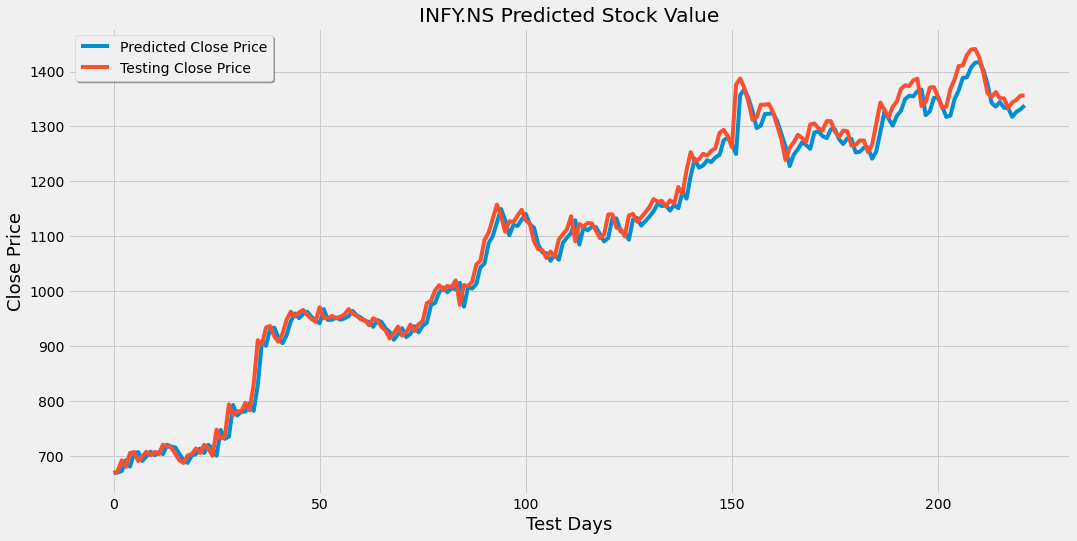

In [ ]:
# Plot the Data
plt.figure(figsize=(16,8))
plt.title('INFY.NS Predicted Stock Value')
plt.plot(prediction, label="Predicted Close Price")
plt.plot([row[0] for row in Y_test], label="Testing Close Price")
plt.xlabel('Test Days',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.legend(loc='top right', fancybox=True, shadow=True)
plt.show()


In [ ]:
df3=pd.DataFrame(data=[prediction,Y_test])
print(prediction,Y_test)

ValueError: ignored